<a href="https://colab.research.google.com/github/bhartimanjhi/Handwrittendigitprediction/blob/main/Hand_written_Digit_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand written Digit prediction Project:-**

# **import Library**

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

# **import Data**

In [ ]:
from sklearn.datasets import load_digits

In [53]:
df = load_digits()

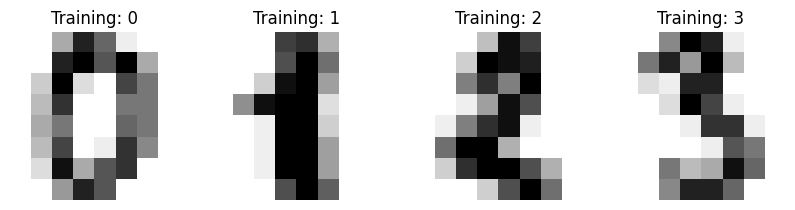

In [56]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols= 4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)

# **Data preprocessing**

# **Flatten image**

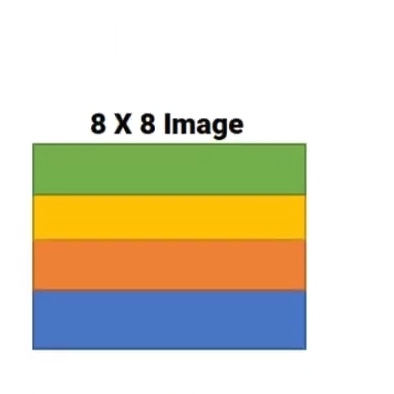



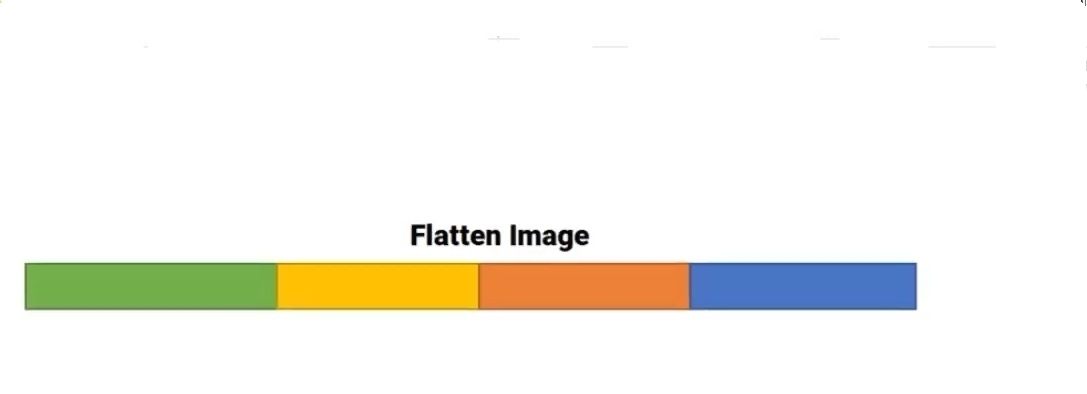

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape

(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [24]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [25]:
data[0].shape

(64,)

In [26]:
data.shape

(1797, 64)

# **scaling image data**

In [27]:
data.min()

0.0

In [28]:
data.max()

16.0

In [29]:
data = data/16

In [30]:
data.min()

0.0

In [31]:
data.max()

1.0

In [32]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train test split data**

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier()

In [38]:
rf.fit(x_train, y_train)

RandomForestClassifier()

# **Prediction of Test Data**

In [39]:
y_pred = rf.predict(x_test)

In [40]:
y_pred

array([3, 3, 2, 9, 2, 0, 2, 1, 0, 5, 7, 9, 3, 9, 0, 4, 8, 8, 0, 8, 6, 0,
       8, 6, 6, 6, 6, 0, 0, 9, 5, 1, 6, 1, 7, 5, 2, 8, 0, 1, 0, 3, 8, 9,
       2, 6, 9, 8, 2, 1, 1, 4, 7, 2, 6, 5, 4, 5, 3, 8, 9, 8, 1, 9, 8, 5,
       2, 3, 2, 8, 6, 5, 5, 4, 8, 7, 5, 9, 7, 2, 1, 8, 5, 9, 6, 6, 3, 4,
       4, 6, 8, 5, 3, 5, 2, 1, 2, 0, 5, 7, 0, 6, 7, 0, 4, 1, 1, 9, 5, 8,
       0, 7, 7, 6, 8, 1, 7, 7, 4, 8, 1, 4, 3, 5, 8, 1, 2, 1, 6, 9, 7, 9,
       8, 8, 3, 9, 9, 3, 6, 0, 4, 5, 2, 5, 8, 4, 0, 1, 5, 5, 3, 8, 6, 2,
       3, 0, 7, 3, 9, 6, 4, 2, 6, 4, 9, 4, 1, 7, 4, 5, 4, 2, 5, 0, 4, 8,
       7, 4, 3, 8, 2, 5, 3, 6, 6, 3, 9, 4, 0, 7, 0, 4, 9, 3, 2, 1, 6, 6,
       9, 3, 2, 2, 5, 6, 1, 3, 1, 1, 7, 7, 1, 8, 3, 9, 4, 0, 9, 1, 6, 6,
       4, 7, 7, 4, 3, 5, 3, 6, 2, 4, 2, 9, 9, 9, 8, 5, 1, 1, 9, 9, 5, 8,
       5, 0, 5, 8, 9, 1, 8, 0, 5, 7, 6, 9, 1, 3, 7, 0, 8, 3, 8, 3, 0, 8,
       9, 0, 1, 5, 1, 5, 8, 6, 4, 8, 0, 0, 7, 5, 7, 6, 0, 9, 9, 1, 5, 6,
       4, 4, 8, 3, 1, 5, 8, 4, 9, 7, 3, 3, 4, 9, 7,

# **Model Accuracy**

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
confusion_matrix(y_test, y_pred)

array([[48,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 53,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  1,  2],
       [ 0,  0,  0,  0, 50,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 63,  1,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 45,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 45,  0,  0],
       [ 0,  3,  0,  0,  0,  1,  0,  1, 53,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 61]])

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.90      1.00      0.95        53
           2       1.00      0.96      0.98        52
           3       0.98      0.95      0.96        55
           4       0.96      0.98      0.97        51
           5       0.98      0.95      0.97        66
           6       0.98      0.96      0.97        47
           7       0.96      0.98      0.97        46
           8       0.93      0.90      0.91        59
           9       0.95      0.97      0.96        63

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



# **Explaination:-**

In the hand-written digit prediction project, using a dataset of hand-written digit images called  MNIsT, having goal is to develop a machine learning model that can accurately predict the digits from hand-written images. the dataset is typically divided into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance.

Thank you  